In [1]:
# 尝试分析一下数据表征的分布

import torch as torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pickle
plt.rcParams['axes.unicode_minus'] = False

path = "/home/zzx/seqRec/CLTrys/CoSeRec/CoSeRec-Sports_and_Outdoors-0_item_embeddings.pt"

repres = torch.load(path).cpu().numpy()



/home/zzx/anaconda3/envs/env1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
repres.shape
ts = TSNE(n_components=2, random_state=0)
data = ts.fit_transform(repres)

In [7]:
# 频率信息load进来
import numpy as np
from collections import defaultdict

dataset_name = "Sports_and_Outdoors"
with open(f"/home/zzx/seqRec/CLTrys/CoSeRec/data/{dataset_name}.txt","r") as f:
    raw_data = f.readlines()
Seqs = [each.strip().split(' ')[1:] for each in raw_data]

item_frequency = defaultdict(int)

for seq in Seqs:
    for each_item in seq:
        item_frequency[int(each_item)] +=1

In [18]:
keys = item_frequency.keys()
print(keys)
values = sorted(item_frequency.items(), key=lambda item: item[1], reverse=True)
print(values)
high_freq = np.array([each[0] for each in values[:int(len(values)/3)]])
mid_freq = np.array([each[0] for each in values[int(len(values)/3): 2*int(len(values)/3)]])
low_freq = np.array([each[0] for each in values[2*int(len(values)/3):]])



dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

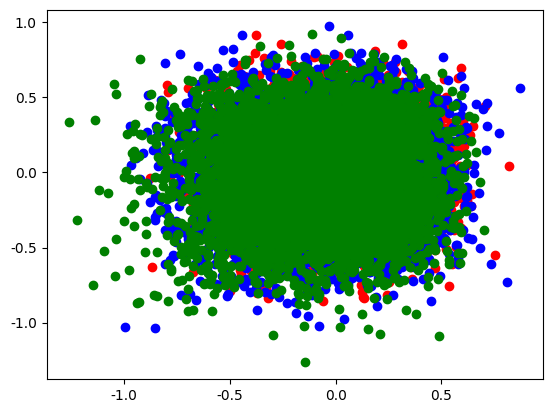

In [20]:
high_freq_sampled = high_freq[np.random.choice(high_freq.shape[0], 1000, replace=False)]
mid_freq_sampled = mid_freq[np.random.choice(mid_freq.shape[0], 1000, replace=False)]
low_freq_sampled = low_freq[np.random.choice(low_freq.shape[0], 1000, replace=False)]
  
fig = plt.figure()      # 创建图形实例
ax = plt.subplot(111)       # 创建子图  
ax.scatter(repres[high_freq][:,0].squeeze(), repres[high_freq][:,1].squeeze(), c="red",label="high freq")
ax.scatter(repres[mid_freq][:,0].squeeze(), repres[mid_freq][:,1].squeeze(), c="blue",label="mid freq")
ax.scatter(repres[low_freq][:,0].squeeze(), repres[low_freq][:,1].squeeze(), c="green",label="low freq")

plt.show()


# 看上去是完全混杂在一起的

